In [1]:
# Imports
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/Preprocessed_Data.csv")

In [3]:
df

,order_id,R_Lat,R_Lon,C_Lat,C_Lon,order_pickedup_time,order_delivered_time,Distance (km),Delivery_Hour,State,Delivery_Time (sec)
0,PRD_ZMT_2960011,28.468983,77.063728,28.449929,77.071230,2016-04-23 09:30:20,2016-04-23 09:57:04,2.242045,9,Haryana,1604.0
1,PRD_ZMT_2964555,28.468983,77.063728,28.454522,77.066637,2016-04-23 11:05:32,2016-04-23 11:27:10,1.632941,11,Haryana,1298.0
2,PRD_ZMT_2968945,28.468983,77.063728,28.461570,77.067590,2016-04-23 14:49:07,2016-04-23 15:07:18,0.906626,14,Haryana,1091.0
3,PRD_ZMT_2976663,28.468983,77.063728,28.455738,77.058401,2016-04-23 16:43:14,2016-04-23 17:16:12,1.562127,16,Haryana,1978.0
4,PRD_ZMT_2985948,28.468983,77.063728,28.440068,77.083967,2016-04-24 07:54:14,2016-04-24 08:16:29,3.775236,7,Haryana,1335.0
...,...,...,...,...,...,...,...,...,...,...,...
237368,PRD_ZMT_8457746,28.532886,77.207941,28.503037,77.201892,2016-09-25 16:49:02,2016-09-25 17:18:55,3.371266,16,Delhi,1793.0
237369,PRD_ZMT_8458181,22.544237,88.352148,22.560074,88.369037,2016-09-25 17:07:48,2016-09-25 17:22:04,2.471663,17,West Bengal,856.0
237370,PRD_ZMT_8458897,19.122455,72.916411,19.104956,72.918557,2016-09-25 17:22:39,2016-09-25 17:43:55,1.958820,17,Maharashtra,1276.0
237371,PRD_ZMT_8458955,17.450286,78.379158,17.444102,78.391155,2016-09-25 17:07:15,2016-09-25 17:26:16,1.446523,17,Telangana,1141.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237373 entries, 0 to 237372
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              237373 non-null  object 
 1   R_Lat                 237373 non-null  float64
 2   R_Lon                 237373 non-null  float64
 3   C_Lat                 237373 non-null  float64
 4   C_Lon                 237373 non-null  float64
 5   order_pickedup_time   237373 non-null  object 
 6   order_delivered_time  237373 non-null  object 
 7   Distance (km)         237373 non-null  float64
 8   Delivery_Hour         237373 non-null  int64  
 9   State                 237373 non-null  object 
 10  Delivery_Time (sec)   237373 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 19.9+ MB


In [5]:
# For incomplete data
# df = df[:194000]
# df

In [6]:
df["Delivery_Time (min)"] = df["Delivery_Time (sec)"] / 60

In [7]:
df.drop(columns="Delivery_Time (sec)", inplace=True)

# These many people have ordered and received in the restaurant itself. Probably, they entered the restaurant and checked online price & found it cheaper. They must be engineers 💯 😎

In [8]:
eng = len(df[df["Distance (km)"] == 0])
print(f"{eng} ({eng / len(df)}%) people have received the order in the restaurant itself!!")

5357 (0.022567857338450455%) people have received the order in the restaurant itself!!


# Let's analyze delivery speed

In [9]:
df["Delivery_Speed (min/km)"] = 1

for i in range(len(df)):
    if df.loc[i, "Distance (km)"] == 0:
        df.loc[i, "Delivery_Speed (min/km)"] = df.loc[i, "Delivery_Time (min)"]
    else:
        df.loc[i, "Delivery_Speed (min/km)"] = df.loc[i, "Delivery_Time (min)"] / df.loc[i, "Distance (km)"]

/tmp/ipykernel_28288/270017328.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.923638034356124' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, "Delivery_Speed (min/km)"] = df.loc[i, "Delivery_Time (min)"] / df.loc[i, "Distance (km)"]


## State wise average delivery speed

In [10]:
df.groupby("State").mean("Delivery_Speed (min/km)").drop(
    columns=["R_Lat", "R_Lon", "C_Lat", "C_Lon", "Distance (km)", "Delivery_Hour", "Delivery_Time (min)"]).rename(
    columns={"Delivery_Speed (min/km)": "Average Delivery_Speed (min/km)"})

,Average Delivery_Speed (min/km)
State,
Borno,0.000112
Delhi,90.749125
Haryana,85.915555
Karnataka,110.104418
Maharashtra,53.730673
Tamil Nadu,55.680021
Telangana,51.822499
West Bengal,40.061957


## Overall average delivery speed

In [11]:
df["Delivery_Speed (min/km)"].mean()

69.96090777013244

# Telengana is the foodiest state with the maximum no of orders 😋

In [12]:
df.groupby("State")["order_id"].count().rename("No of orders").sort_values(ascending=False)

State
Telangana      67348
Delhi          48993
Tamil Nadu     32505
Haryana        30451
Karnataka      25762
West Bengal    24010
Maharashtra     8303
Borno              1
Name: No of orders, dtype: int64

# 3 PM - 4 PM is the peak hour 🕒

In [13]:
for i in range(len(df)):
    if df.loc[i, "Delivery_Hour"] > 12:
        df.loc[i, "Delivery_Hour"] = str(df.loc[i, "Delivery_Hour"] - 12) + "PM"
    else:
        df.loc[i, "Delivery_Hour"] = str(df.loc[i, "Delivery_Hour"]) + "AM"

/tmp/ipykernel_28288/1744956393.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '9AM' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[i, "Delivery_Hour"] = str(df.loc[i, "Delivery_Hour"]) + "AM"


<Axes: >

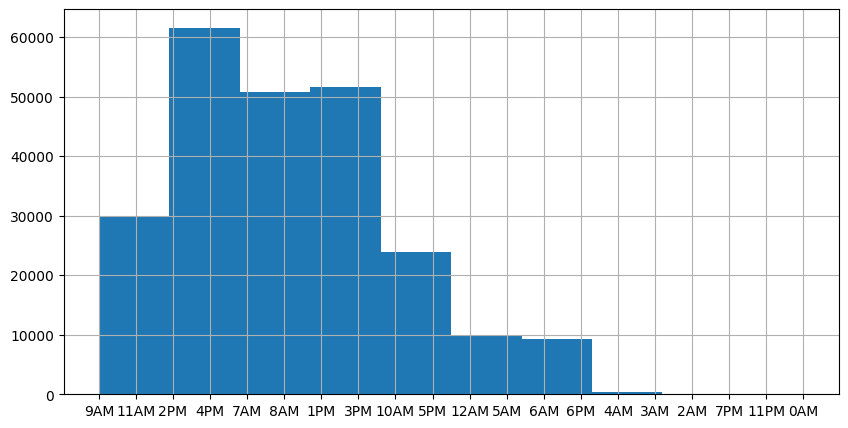

In [14]:
df["Delivery_Hour"].hist(figsize=(10, 5))

# Let's visualize locations of customers on the map
## (I extremely condemn the distorted map presented here but, I could find only this API in this short time. I beg pardon for this misbehave.)

/tmp/ipykernel_28288/2304451477.py:8: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


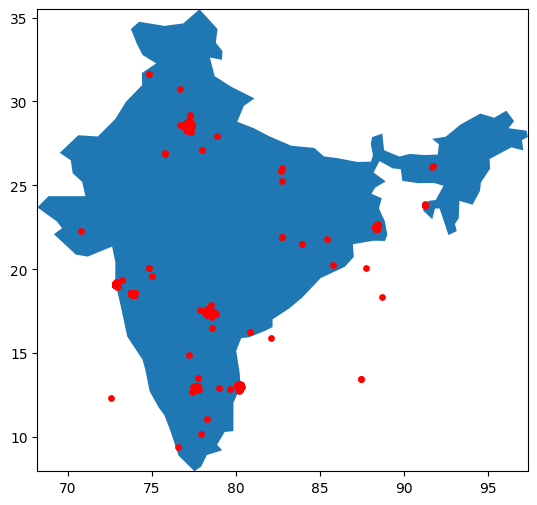

In [15]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['C_Lon'], df['C_Lat'])]
gdf = GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = world[world.name == 'India']
ax = india.plot(figsize=(10, 6))

ax.set_xlim(india.total_bounds[0], india.total_bounds[2])
ax.set_ylim(india.total_bounds[1], india.total_bounds[3])

gdf.plot(ax=ax, marker='o', color='red', markersize=15)
plt.show()